# Analysis of SARS-CoV2 Receptor binding Domain Sequences
# By: Daniela Quijano


In [34]:
#List of state symbols to be used to parse through the 1.45GB .FASTA file 
STATES=['|AL', '|AK', '|AZ','|AR','|CA','|CO','|CT','|DE','|FL','|GA','|HI','|ID','|IL','|IN','|IA','|KS','|KY','|LA','|ME','|MD','|MA','|MI','|MN','|MS','|MO','|MT','|NE','|NV','|NH','|NJ','|NM','|NY','|NC','|ND','|OH','|OK','|OR','|PA','|RI','|SC','|SD','|TN','|TX','|UT','|VT','|VA','|WA','|WV','|WI','|WY']
#Here I am creating a nested list in order to be able to iterate through it when dealing with file grouping
NORTHEAST=['|ME','|NH','|VT','|MA','|RI','|CT','|NY','|NJ','|PA']
SOUTHEAST=['|DE','|MD','|VA','|WV','|NC','|SC','|GA','|FL','|KY','|TN','|AL','|MS']
SOUTHWEST=['|AR','|LA','|OK','|TX']
MOUNTAIN=['|MT','|ID','|WY','|CO','|NM','|AZ','|UT','|NV']
MIDWEST=['|OH', '|IN','|IL','|MI','|WI','|MN','|IA','|MO','|ND','|SD','|NE','|KS']
PACIFIC=['|WA','|OR','|CA','|AK','|HI']
REGIONS_NAMES=[NORTHEAST,SOUTHEAST,SOUTHWEST,MOUNTAIN,MIDWEST,PACIFIC]
regions=['NE','SE','SW','MT','MW','PC']

In [39]:
#Here I create a new list MASK for states with mask mandates
#To create this list i loop through each element in STATES
#If the element is NOT in NO_MASK it is appended to the new list, MASK 
#print statement confirms success.
#Following the same logic, I create a list of States with limited outdoor gathering
NO_MASK=['|FL','|AZ','|GA','|ID','|MO','|NE','|OK','|SC','|SD','|TN']
MASK=[]
LIM_OUTDOOR=['|CA','|CO','|CT','|DE','|HI','|ME','|MA','|MI','|NJ','|NY','|NC','|PA','|VT']
NO_LIM=[]

for element in STATES:
    if element not in NO_MASK:
        MASK.append(element)
    if element not in LIM_OUTDOOR:
        NO_LIM.append(element)

print((MASK))
#I make a new list with the different mandates masks or outdoor gathering limits for file creation purposes 
LOW_VAX=['|ID','|WY','|MS','|WV','|LA','|AL','|IN','|TN','|ND','|OH']
HIGH_VAX=['|VT','|RI','|ME','|CT','|MA','|NY','|NJ','|MD','|VA','|WA','|NH','|OR','|NM','|CA','|CO','|MN']

#The list below, mandates indicates the groupings of states based on certain laws/regulations
#This list is important for file classification later on 
MANDATES=[NO_MASK,MASK,LIM_OUTDOOR,NO_LIM,LOW_VAX,HIGH_VAX]


['|AL', '|AK', '|AR', '|CA', '|CO', '|CT', '|DE', '|HI', '|IL', '|IN', '|IA', '|KS', '|KY', '|LA', '|ME', '|MD', '|MA', '|MI', '|MN', '|MS', '|MT', '|NV', '|NH', '|NJ', '|NM', '|NY', '|NC', '|ND', '|OH', '|OR', '|PA', '|RI', '|TX', '|UT', '|VT', '|VA', '|WA', '|WV', '|WI', '|WY']


In [41]:
#Here I make paths to the fiddferent folders i will be using throughout the assignment

STATES_FOLDERPATH='/Users/danielaquijano/Problemsolvingforbioinformatics2021fall/FinalProject.RelatedFiles/FINAL_FILES/STATES/'
STATES_RBD_ONLY_PATH='/Users/danielaquijano/Problemsolvingforbioinformatics2021fall/FinalProject.RelatedFiles/FINAL_FILES/STATES_RBD_NO_TEXT/'
STATES_TRIM_100_PATH='/Users/danielaquijano/Problemsolvingforbioinformatics2021fall/FinalProject.RelatedFiles/FINAL_FILES/STATES_TRIM/'
#I conitnue by now checking the path ot the folder with the Mandates
MANDATES_FOLDERPATH='/Users/danielaquijano/Problemsolvingforbioinformatics2021fall/FinalProject.RelatedFiles/FINAL_FILES/MANDATES/'
REGIONS_FOLDERPATH='/Users/danielaquijano/Problemsolvingforbioinformatics2021fall/FinalProject.RelatedFiles/FINAL_FILES/REGIONS/'
VAXRATES_FOLDERPATH='/Users/danielaquijano/Problemsolvingforbioinformatics2021fall/FinalProject.RelatedFiles/FINAL_FILES/VAXRATES/'
#Now I make another set of files for the cleaned up RBD for each state.
STATES_RBD_FOLDERPATH='/Users/danielaquijano/Problemsolvingforbioinformatics2021fall/FinalProject.RelatedFiles/FINAL_FILES/STATES_RBD/'
#Lastly, I need a folder to hold all of the Multipla sequence alignments (MSA) for every category
#One folder is for the input file for the mutliple sequence alignment function
#Another folder is for the output of the multiple sequence alignment function
MSA_FOLDERPATH='/Users/danielaquijano/Problemsolvingforbioinformatics2021fall/FinalProject.RelatedFiles/FINAL_FILES/MSA_INPUT/'
MSA_FOLDERPATH_OUT='/Users/danielaquijano/Problemsolvingforbioinformatics2021fall/FinalProject.RelatedFiles/FINAL_FILES/MSA_OUT/'


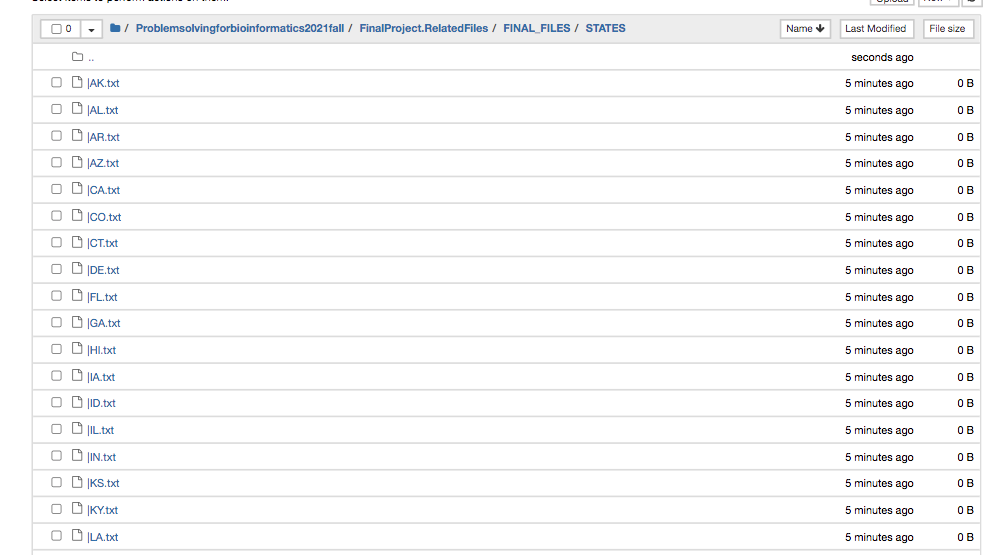

In [23]:
#THIS CODE HERE IS FOR FILE CLEARING IN CASE OF MISTAKE.
#for state in STATES_TEST:
    #STATE_FILE = open(str(STATES_FOLDERPATH)+str(state)+'.txt', 'w')
    #STATE_FILE.write(' ')
    #STATE_FILE.close()

In [5]:
###code works####
#Here I use the SeqIO module in order to parse the Glycoproteins file 
#I loop through the list of states and systematically open each file for each state and write any entry that contains state name
#File oppened as 'append' to avoid overwriting
#Continue loop ensures that loop goes on to next iteration to fill in the file for the enst state in the list
#Below is an image of two sample states and what they look like when filled in

def Glyco_to_states():
    from Bio import SeqIO
    Open_Glycoproteins=open('/Users/danielaquijano/Problemsolvingforbioinformatics2021fall/FinalProject.RelatedFiles/AllSurfaceGlycoproteinSeqs.fasta', 'r')

    for entry in SeqIO.parse(Open_Glycoproteins,'fasta'):
        for state in STATES:
                if state in entry.description:
                    STATE_FILE = open(str(STATES_FOLDERPATH)+str(state)+'.txt', 'a')
                    STATE_FILE.write('>'+str(entry.description)+ '\n'+str(entry.seq)+'\n')
                    STATE_FILE.close()
                    continue
#I manually stopped the kernel so that is the reason for the interrupted message below

KeyboardInterrupt: 

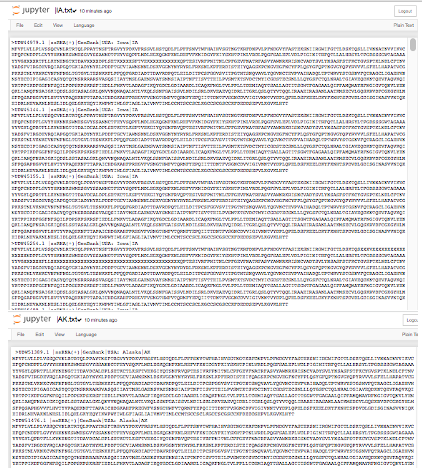

In [12]:
#Here I clean up the RBD from Each state 
#I  also create a separate folder for States+RBD but without the message
#The folder with RBD without the message contains the id and the state name and only rbd trimmed sequence
#The folder of rbd without message will be used for multiple sequence alignment
#########code works

def RBD_CLEANANDTRIM():
    from Bio import SeqIO
    import re

    for state in STATES:
        STATE_FILE = open(str(STATES_FOLDERPATH)+str(state)+'.txt', 'r')
        STATE_RBD_FILE=open(str(STATES_RBD_FOLDERPATH)+str(state)+'_RBD.txt', 'a')
        STATES_RBD_ONLY=open(str(STATES_RBD_ONLY_PATH)+str(state)+'_ONLY_RBD.txt','a')
        for entry in SeqIO.parse(STATE_FILE,'fasta'):
            if re.search(r'RVQPT.*KCVNF', str(entry.seq)):
                searching=re.search(r'RVQPT.*KCVNF', str(entry.seq))
                STATE_RBD_FILE.write('>RBD_'+str(state)+'  '+str(entry.description)+"  The Start of RBD is position   "+(str(searching.start()))+ "  The End of RBD is position   "+(str(searching.end()))+'\n'+str(entry.seq[searching.start():searching.end()])+'\n')
                STATES_RBD_ONLY.write('>RBD_'+str(state)+' '+str(entry.id)+'\n'+str(entry.seq[searching.start():searching.end()])+'\n')
        STATE_FILE.close()
        STATE_RBD_FILE.close()
    

In [19]:
######trimming to 100 sequences###########CODE WORKS###################

#Now that i have a file of ony the RBD with no text, only the sequence identifier and sequence
#I can trim each of the files to 100 sequences in order to make the sequence alignment easier
#First I am going to extract the first 100 sequences from the TX_RBD file and write them to a new file in a new folder
#I am going to write the first 100 sequences to a new file to using for clustalw alignment (via command line)

def CUT100:
    from Bio import SeqIO

    STATES_RBD_ONLY_PATH='/Users/danielaquijano/Problemsolvingforbioinformatics2021fall/FinalProject.RelatedFiles/FINAL_FILES/STATES_RBD_NO_TEXT/'
    STATES_TRIM_PATH='/Users/danielaquijano/Problemsolvingforbioinformatics2021fall/FinalProject.RelatedFiles/FINAL_FILES/STATES_TRIM/'
    for state in STATES:
        STATE_RBD_SOURCE=open(str(STATES_RBD_ONLY_PATH)+str(state)+'_ONLY_RBD.txt','r')
        records = list(SeqIO.parse(STATE_RBD_SOURCE, "fasta"))
        for i in range(0,100):
            STATE_RBD_100=open(str(STATES_TRIM_100_PATH)+str(state)+'_100.txt','a')
            STATE_RBD_100.write('>'+str(i)+str(records[i].description)+'\n'+str(records[i].seq)+'\n')
        STATE_RBD_SOURCE.close()
        STATE_RBD_100.close()
        
#I am counting the first 100 records with a for loop by turning the entries of the Texas file into a list.
#I am also taking advantage of the numbering in the for loop to make sure that the sequence names are UNIQUE
#I had lots of trouble with the sequence naming because clustal kept telling me the sequence names were the same
#I decide to use numebrs to keep betteer track of the sequence names
#I make sure to keep the '>' first to keep the format as fasta and to be able to continue with alignment

In [27]:
#######THE CODE WORKS#################################
#Here i begin grouping the sequences by category
#Each group represents one multiple sequence alignment later on 
#I am using the trimmed sequences (100 in each file)
#Maximum output that clustal omega cna handle is 4MB 
#Here I group the sequences into different regions for the MSA input file
#Each file that is produced will go through alignment and a phylogenetic tree absed on region will be produced 
#ClustalIO will be used later in order to perform this action.
REGIONS_NAMES=[NORTHEAST,SOUTHEAST,SOUTHWEST,MOUNTAIN,MIDWEST,PACIFIC]

STATES_TRIM_100_PATH='/Users/danielaquijano/Problemsolvingforbioinformatics2021fall/FinalProject.RelatedFiles/FINAL_FILES/STATES_TRIM/'
MSA_FOLDERPATH='/Users/danielaquijano/Problemsolvingforbioinformatics2021fall/FinalProject.RelatedFiles/FINAL_FILES/MSA_INPUT/'

def REGIONGROUPS:
    for region in REGIONS_NAMES:
        for state in region:
            STATE_RBD_SOURCE=open(str(STATES_TRIM_100_PATH)+str(state)+'_100.txt','r')
            MSA_GROUP_INFILE= open(str(MSA_FOLDERPATH)+str(region)+'_MSA.txt', 'a')
            for line in STATE_RBD_SOURCE:
                MSA_GROUP_INFILE.write(line)
            STATE_RBD_SOURCE.close()
            MSA_GROUP_INFILE.close()
        
#See kernel below for what the output looks like. 
#I am manually changing the name of each file for convenience. 
        
#######THE CODE WORKS#################################

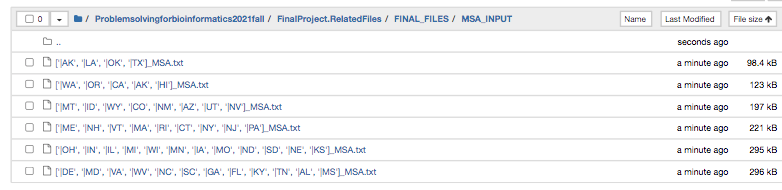

In [41]:
#The print statement below helps visualize how the states are grouped based on mandate

for item in MANDATES:
    print(item)

['|FL', '|AZ', '|GA', '|ID', '|MO', '|NE', '|OK', '|SC', '|SD', '|TN']
['|AL', '|AK', '|AR', '|CA', '|CO', '|CT', '|DE', '|HI', '|IL', '|IN', '|IA', '|KS', '|KY', '|LA', '|ME', '|MD', '|MA', '|MI', '|MN', '|MS', '|MT', '|NV', '|NH', '|NJ', '|NM', '|NY', '|NC', '|ND', '|OH', '|OR', '|PA', '|RI', '|TX', '|UT', '|VT', '|VA', '|WA', '|WV', '|WI', '|WY']
['|CA', '|CO', '|CT', '|DE', '|HI', '|ME', '|MA', '|MI', '|NJ', '|NY', '|NC', '|NC', '|PA', '|VT']
['|AL', '|AK', '|AZ', '|AR', '|FL', '|GA', '|ID', '|IL', '|IN', '|IA', '|KS', '|KY', '|LA', '|MD', '|MN', '|MS', '|MO', '|MT', '|NE', '|NV', '|NH', '|NM', '|ND', '|OH', '|OK', '|OR', '|RI', '|SC', '|SD', '|TN', '|TX', '|UT', '|VA', '|WA', '|WV', '|WI', '|WY']
['|ID', '|WY', '|MS', '|WV', '|LA', '|AL', '|IN', '|TN', '|ND', '|OH']
['|VT', '|RI', '|ME', '|CT', '|MA', '|NY', '|NJ', '|MD', '|VA', '|WA', '|NH', '|OR', '|NM', '|CA', '|CO', '|MN']


In [46]:
#Here I repeat the process of categorizing the states by mandates, I use the same code i used for regions with some substitutions
#The naming of the files: The string of all states was too long
#I named each file with the first three states in the lsit
#I then manually change the names of the filesd to match each mandate category.
#I use the printed lists in the kernel above for reference!
#The code names the files with states alphabetically so i have to cross check to name them
#They come out alphabetical since my STATES list is alphabetical

MANDATES=[NO_MASK,MASK,LIM_OUTDOOR,NO_LIM,LOW_VAX,HIGH_VAX]

def MANDATESGROUP:
    for region in MANDATES:
        MSA_GROUP_INFILE= open(str(MSA_FOLDERPATH)+str(region[0])+str(region[2])+str(region[3])+'_MSA.txt', 'a')
        for state in region:
            STATE_RBD_SOURCE=open(str(STATES_TRIM_100_PATH)+str(state)+'_100.txt','r')
            for line in STATE_RBD_SOURCE:
                MSA_GROUP_INFILE.write(line)
            STATE_RBD_SOURCE.close()
            MSA_GROUP_INFILE.close()
    
#See below to see what all files look like grouped in a folder. 
#This folder will be used for MSA shortly. 

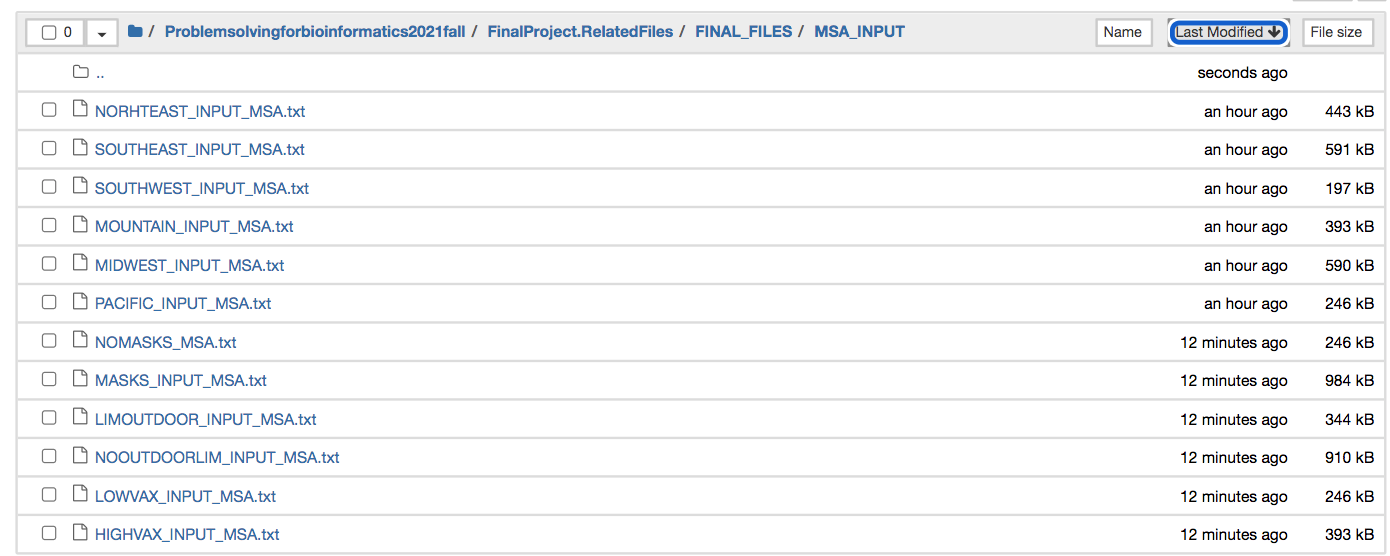

In [45]:
#Since ClustalW needs the begining of each line to be different, 
#I am going to number each entry in each of the groups by creating a new numebred file
#I create a list to iterate over and created New Numbered files

#TRYING TO NUMBER THE LINES ONCE AGAIN 
#Now all groups are numbered uniquely
#I make an inner for loop of range range(0,int((length+1)/2)) becauuse the length is odd so i need to add one to make it even

def UNIQUE_FOR_CLUSTALW:

    from Bio import SeqIO

    MSA_FOLDERPATH='/Users/danielaquijano/Problemsolvingforbioinformatics2021fall/FinalProject.RelatedFiles/FINAL_FILES/MSA_INPUT/'
    FILENAMES=['NORTHEAST_INPUT','SOUTHEAST_INPUT','SOUTHWEST_INPUT','MOUNTAIN_INPUT','MIDWEST_INPUT','PACIFIC_INPUT','NOMASKS_INPUT','MASKS_INPUT','LIMOUTDOOR_INPUT','NOOUTDOORLIM_INPUT','LOWVAX_INPUT','HIGHVAX_INPUT']

    for file in FILENAMES:
        count=0
        FILE=open(str(MSA_FOLDERPATH)+str(file)+'_MSA.txt','r')
        NUMBERED_FILE=open(str(MSA_FOLDERPATH)+str(file)+'_NUMS_MSA.txt','a')
        records = list(SeqIO.parse(FILE, "fasta"))
        length=(len(records))
        for i in range(0,int((length+1)/2)):
            NUMBERED_FILE.write('>'+str(i)+str(records[i].description)+'\n'+str(records[i].seq)+'\n')
        FILE.close()
        NUMBERED_FILE.close()

In [48]:
# I had some trouble with the enumeration of the LOW_VAX, NO_OUTDOORLIMIT,LIMITED OUTDOOR and MASK groups
# I am writing some code to make sure these files are enumerated so that clustalW is able to read them 
#I am looping through the already created files in MSA_INPUT Folder
#I am looping through the file line by line and adding a number based on the line

def FIX_NUMBERING():
    from Bio import SeqIO

    FILES_TO_FIX=['MASKS_INPUT_MSA.txt','LOWVAX_INPUT_MSA.txt','LIMOUTDOOR_INPUT_MSA.txt','HIGHVAX_INPUT_MSA.txt']
    for file in FILES_TO_FIX:
        count=0
        FILE=open(str(MSA_FOLDERPATH)+str(file),'r')
        NUMBERED_FILE=open(str(MSA_FOLDERPATH)+str(file)+'FIXED_NUMS_MSA.txt','a')
        records = list(SeqIO.parse(FILE, "fasta"))
        length=int(len(records))
        for i in range(0,length):
            NUMBERED_FILE.write('>'+str(i)+str(records[i].description)+'\n'+str(records[i].seq)+'\n')
        FILE.close()
        NUMBERED_FILE.close()

In [47]:
#Here I perform an MSA on state groupings by regions and mandates
#I performed the alignment on Terminal with ClustalW installed on my computer
#I downloaded the files onto my documents and performed the alignment for each
#For each file I obtain an .aln and .dnd file
#.aln is the alignment
#.dnd is the guide tree that will be used for the phylogenetic tree construction
#Below are the screenshots of what the terminal looks like when algining the file for NORTHEAST region
#I am producing an ascii tree for each of the files, but i am only keeping the plot made and cleaned by matplotlib
#Matplot lib is more customizable and readable

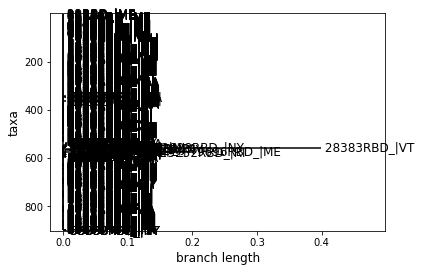

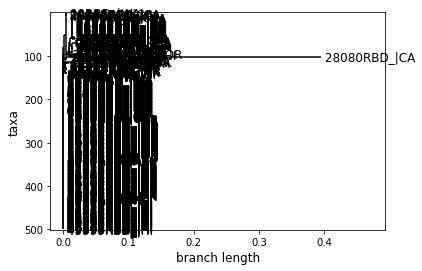

KeyboardInterrupt: 

In [52]:
#This is some code to loop through the guidetrees in PHYLO_TREES folder in order to make the phylogenetic trees
#ascii tree is made as well for each-optional, leaving it out as a comment
#i stopped this kernel prematurely in order to avoid issues with the size of the output trees-my computer couldnt handle it
#The loop wporks, i ended up making the trees ne by one due to memory issues. The code below is fully functional 

GUIDETREE_NAMES=['NORTHEAST_NUMS_GUIDETREE','PACIFIC_GUIDETREE','SOUTHEAST_GUIDETREE','MOUNTAIN_GUIDETREE','MIDWESTGUIDETREE','SOUTHWEST_GUIDETREE','HIGHVAX_GUIDETREE','NOMASKS_GUIDETREE','LOWVAX_FIXED_GUIDETREE','LIMOUTDOOR_GUIDETREE']
PHYLO_TREE_PATH=('/Users/danielaquijano/Problemsolvingforbioinformatics2021fall/FinalProject.RelatedFiles/FINAL_FILES/PHYLO_TREES/')
for name in GUIDETREE_NAMES:
    from Bio import Phylo
    import networkx
    from networkx.drawing import nx_agraph
    tree = Phylo.read(PHYLO_TREE_PATH+ str(name), "newick")
#Phylo.draw_ascii(tree)
    import matplotlib 
    import matplotlib.pyplot as plt
    fig=Phylo.draw(tree)
    fig=plt.figure(figsize=(200,200),dpi=100)
    matplotlib.rc('font',size=12)
    matplotlib.rc('xtick',labelsize=10)
    matplotlib.rc('ytick',labelsize=10)
    axes=fig.add_subplot(1,1,1)
    #Phylo.draw(tree,axes=axes)
    fig.savefig(str(name)+'PHYLO_TREE')

In [18]:
#Here I create the zip files of the files that I have worked with
#I did this one by one as each folder was being worked on rather than a loop  for my own organizational purposes
#I first parsed the source file to create the STATES file with sequences from each state-> becomes STATES.zip
#Next, i processed the sequences from each state to obtain the RBD only-> Becomes STATES_RBD


import os
import zipfile

State_zip=zipfile.ZipFile('STATES.zip','w')
for dirname, subdirs, files in os.walk(STATES_FOLDERPATH):
    State_zip.write(dirname)
    for filename in files:
        State_zip.write(os.path.join(dirname, filename))
State_zip.close()

State_rbd_zip=zipfile.ZipFile('STATES_RBD.zip','w')
for dirname, subdirs, files in os.walk('/Users/danielaquijano/Problemsolvingforbioinformatics2021fall/FinalProject.RelatedFiles/FINAL_FILES/STATES_RBD/'):
    State_rbd_zip.write(dirname)
    for filename in files:
        State_rbd_zip.write(os.path.join(dirname, filename))
State_rbd_zip.close()

STATES_TRIM=zipfile.ZipFile('STATES_100_TRIM.zip','w')
for dirname, subdirs, files in os.walk('/Users/danielaquijano/Problemsolvingforbioinformatics2021fall/FinalProject.RelatedFiles/FINAL_FILES/STATES_RBD_NO_TEXT/'):
    STATES_TRIM.write(dirname)
    for filename in files:
        STATES_TRIM.write(os.path.join(dirname, filename))
STATES_TRIM.close()



MSA_INPUT_ZIP=zipfile.ZipFile('MSA_INPUTZIP.zip','w')
for dirname, subdirs, files in os.walk('/Users/danielaquijano/Problemsolvingforbioinformatics2021fall/FinalProject.RelatedFiles/FINAL_FILES/MSA_INPUT/'):
    MSA_INPUT_ZIP.write(dirname)
    for filename in files:
        MSA_INPUT_ZIP.write(os.path.join(dirname, filename))
MSA_INPUT_ZIP.close()
